## Synaptic Strength Initialization

In [24]:
import numpy as np  

dim_syn = 10

w = np.random.normal(0.0, pow(dim_syn, -0.5), dim_syn)

print(w)

[-0.15403012 -0.19227998 -0.52631427  0.42747769 -0.07632057 -0.29088057
 -0.08814504 -0.38002762 -0.11419482  0.17260809]


In [25]:
np.linalg.norm(w)

0.8977202417781367

In [22]:
dim_syn = 12
w = np.random.normal(0.0, pow(dim_syn, -0.5), (3,4))
print(w)

[[-0.04064273  0.17832745  0.49938595 -0.09017347]
 [ 0.28982163  0.5940022   0.24858679  0.21483297]
 [-0.79657223 -0.36468516 -0.24202511 -0.00962504]]


In [23]:
np.linalg.norm(w)

1.2891645543239734

## Dimension reduction via linear transformation

In [3]:
w1 = np.array([[0,1,0,-1], [-1,1,1,0], [0,1,-1,0]])
w2 = np.array([[1,0,-1], [0,1,1]])
W = np.matmul(w2, w1)
print(W)

[[ 0  0  1 -1]
 [-1  2  0  0]]


In [4]:
output = np.matmul(W, np.array([1,2,3,4]))
output

array([-1,  3])

## Two-layer Perceptron for MNIST recognition

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.w1 = np.random.normal(0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0
        
    def softmax(self, x):
        e_x = np.exp(x-np.max(x))
        return e_x / e_x.sum(axis=0)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a, b) - self.theta)
        return self.sigmoid(np.dot(self.h, self.w2) - self.theta)
    
    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1)-self.theta)
    
    def bprop_w2(self, g, y):
        q = (-2)*(g-y)*y*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim, 1), q.reshape(1, self.output_dim))
    
    def bprop_w1(self, g, y, x):
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1, self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
        
        self.w1 = self.w1 - self.lr * self.bprop_w1(g, y, x)    #### w1 먼저 update 해주어야 함!!!
        self.w2 = self.w2 - self.lr * self.bprop_w2(g, y)

In [53]:
#### Training

input_dim = 784
hidden_dim = 100
output_dim = 10
epoch = 10

pct = perceptron(input_dim, hidden_dim, output_dim, lr=0.1)

In [54]:
training_dataset_file = open("mnist_train_200.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()

for k in range(epoch):
    pct.lr = pct.lr * 0.8    #### lr 안줄이면 최근에 배운것을 중요하게 생각해서 과거 배움을 지워버릴 수 있음
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01    #### 흰색 부분이라고 해서 0을 줘버리면 x*w1*w2 하는데 영향력이 아예 0
                                                                    #### 최소 0.01, 최대 1로 해서 아무리 작은 부분이라도 영향은 주게끔
        input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01                       #### 역시 최솟값으로 0.01 사용
        targets[int(all_values[0])] = 0.99                          #### 실제 손글씨 label 값은 0.99 로 둔다.
        
        pct.training(inputs, targets)
        
#### all_values[0]은 그 픽셀 숫자의 Label / all_values[1:]은 각 픽셀값

In [55]:
test_dataset_file = open("mnist_test_200.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
output_list = list()

all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

7


C:\Users\rin46\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


array([0.04650198, 0.00256618, 0.1599598 , 0.26068124, 0.03207507,
       0.03635573, 0.00616038, 0.87839741, 0.1174265 , 0.48496787])

prediction fails, (target, prediction) =  4 9
Prediction =  [0.02938371 0.01873851 0.0495771  0.1601736  0.2685326  0.09269216
 0.03449607 0.17802404 0.10382282 0.33408578]
prediction fails, (target, prediction) =  5 2
Prediction =  [0.07491281 0.05501169 0.26945834 0.03270353 0.23445681 0.08912397
 0.14317891 0.02170267 0.0624403  0.03388016]
prediction fails, (target, prediction) =  6 2
Prediction =  [0.1075695  0.04924796 0.21728521 0.06765996 0.13100637 0.08197677
 0.03211025 0.08920754 0.10989376 0.08059359]
prediction fails, (target, prediction) =  5 0
Prediction =  [0.29229947 0.02822569 0.06245026 0.18654879 0.05357759 0.07437056
 0.03778161 0.11181116 0.14131726 0.06656206]
prediction fails, (target, prediction) =  6 2
Prediction =  [0.02425408 0.1644668  0.22195513 0.04195649 0.158459   0.07121968
 0.07944928 0.09878578 0.09815744 0.05473253]
prediction fails, (target, prediction) =  5 6
Prediction =  [0.07080429 0.04105004 0.02423679 0.16606242 0.10644312 0.14379037
 0.17141

prediction fails, (target, prediction) =  9 3
Prediction =  [0.00939381 0.06278498 0.06575841 0.33828955 0.23367267 0.09714177
 0.07635252 0.09393016 0.06510434 0.19223357]
prediction fails, (target, prediction) =  3 1
Prediction =  [0.0163164  0.19580884 0.09618805 0.17603263 0.15556401 0.12107537
 0.06550956 0.09172462 0.09652267 0.09330713]
prediction fails, (target, prediction) =  4 9
Prediction =  [0.02731187 0.01683149 0.04847847 0.07586327 0.30583931 0.08997199
 0.10779428 0.15085545 0.11438831 0.50439392]
Recognition error rate =  0.35


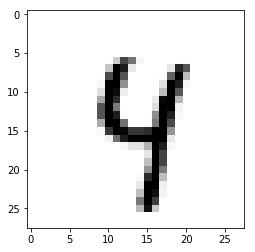

In [56]:
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success += 1
        
    else:
        failure += 1
        print("prediction fails, (target, prediction) = ", target, prediction)
        print("Prediction = ", prediction_list)
        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        plt.imshow(im_array, cmap='Greys', interpolation='None')
        
print("Recognition error rate = ", (failure/(success+failure)))